In [39]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [40]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [41]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size= 4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size= 200, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [42]:
temp = [trainset[i][0] for i in range(len(trainset)-1)]

In [43]:
images = []
labels = []
for i in range(len(temp)):
  if i!=(len(temp)-1):
    a = temp[i]
    b = temp[i+1]
    images.append((a+b)/2)
    labels.append([temp[i],temp[i+1]])
  else:
    a = temp[i]
    b = temp[0]
    images.append((a+b)/2)
    labels.append([temp[i],temp[0]])

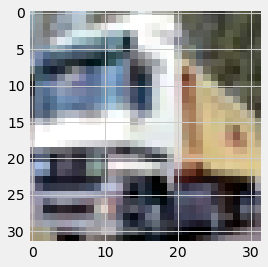

In [44]:
img = torchvision.utils.make_grid(labels[1][0])/(1.75) + 0.5   # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

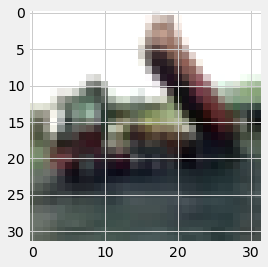

In [45]:
img = torchvision.utils.make_grid(labels[1][1])/(1.75) + 0.5   # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

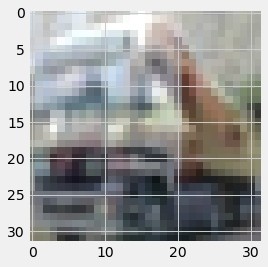

In [46]:
img = torchvision.utils.make_grid(images[1])/(1.75) + 0.5   # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

In [47]:
print(len(images),len(labels))

49999 49999


In [48]:
import random
random.seed(42)
random.shuffle(images)
random.seed(42)
random.shuffle(labels)

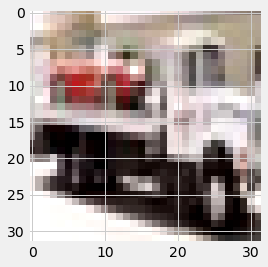

In [49]:
img = torchvision.utils.make_grid(labels[49998][0])/(1.75) + 0.5   # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

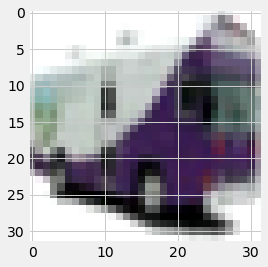

In [50]:
img = torchvision.utils.make_grid(labels[49998][1])/(1.75) + 0.5   # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

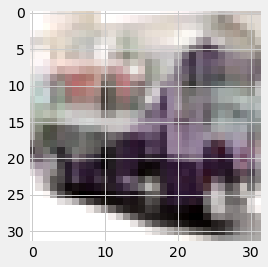

In [51]:
img = torchvision.utils.make_grid(images[49998])/(1.75) + 0.5   # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

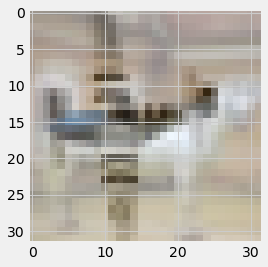

In [52]:
img = torchvision.utils.make_grid(images[1])/(1.75) + 0.5   # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

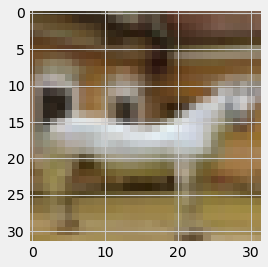

In [53]:
img = torchvision.utils.make_grid(images[1]*2-labels[1][0])/(1.75) + 0.5   # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

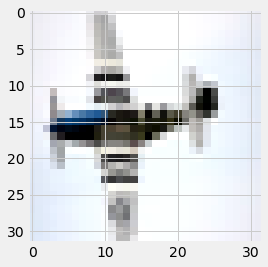

In [54]:
img = torchvision.utils.make_grid(images[1]*2-labels[1][1])/(1.75) + 0.5   # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

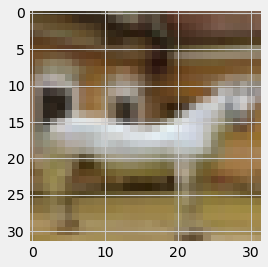

In [55]:
img = torchvision.utils.make_grid(labels[1][1])/(1.75) + 0.5   # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

In [56]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cpu')

In [57]:
# Creating a PyTorch class
class AE(torch.nn.Module):
	def __init__(self):
		super().__init__()
		
		# Building an linear encoder with Linear
		# layer followed by Relu activation function
		# 784 ==> 9
		self.encoder = torch.nn.Sequential(
			torch.nn.Linear(3*32*32, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 36),
			torch.nn.ReLU(),
			torch.nn.Linear(36, 18),
			torch.nn.ReLU(),
			torch.nn.Linear(18, 9)
		)
		
		# Building an linear decoder with Linear
		# layer followed by Relu activation function
		# The Sigmoid activation function
		# outputs the value between 0 and 1
		# 9 ==> 784
		self.decoder = torch.nn.Sequential(
			torch.nn.Linear(9, 18),
			torch.nn.ReLU(),
			torch.nn.Linear(18, 36),
			torch.nn.ReLU(),
			torch.nn.Linear(36, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128,3*32*32),
			torch.nn.Sigmoid()
		)

	def forward(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return decoded


In [58]:
# Model Initialization
model = AE()
model.to(device)

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.SGD(model.parameters(),lr = 0.1 ,weight_decay = 1e-8
														              )


epoch : 1 , loss : 0.13878417015075684
epoch : 2 , loss : 0.1363143026828766
epoch : 3 , loss : 0.12303540855646133
epoch : 4 , loss : 0.200788214802742
epoch : 5 , loss : 0.1339530199766159
epoch : 6 , loss : 0.1284787505865097
epoch : 7 , loss : 0.12996895611286163
epoch : 8 , loss : 0.127481147646904
epoch : 9 , loss : 0.1540626883506775
epoch : 10 , loss : 0.1467890739440918


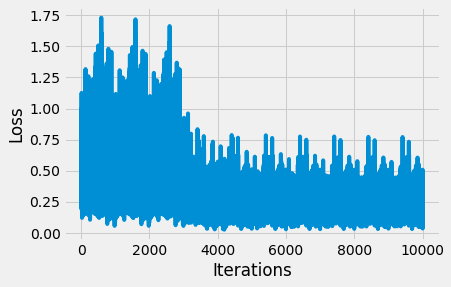

In [59]:
epochs = 10
outputs = []
losses = []
for epoch in range(epochs):
  for i in range(len(images[:1000])):
    x_av = images[i].reshape(-1, 3*32*32)
    label1 = labels[i][0].reshape(-1, 3*32*32)
    label2 = labels[i][1].reshape(-1, 3*32*32)

    # x_av = x_av.
    # label1 = 
    # label2 = 

    x1 = model(x_av)
    x2 = x_av*2-x1
    
    loss = loss_function(x1, label1)
    # loss = loss + loss_function(x2, label2)
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    losses.append(loss.detach().numpy())
  outputs.append((epochs, x_av, x1,x2))
  print(f'epoch : {epoch+1} , loss : {loss}')

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses)


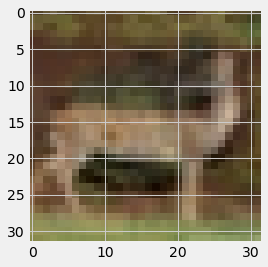

In [60]:
img = torchvision.utils.make_grid(images[10])/(1.75) + 0.5   # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

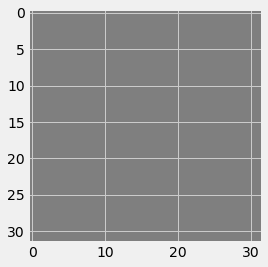

In [61]:
x = model(images[10].reshape(-1, 3*32*32))
img = torchvision.utils.make_grid(x.reshape(3,32,32))/(1.75) + 0.5   # unnormalize
npimg = img.detach().numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

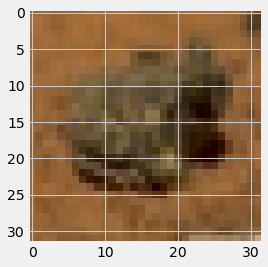

In [62]:
img = torchvision.utils.make_grid(labels[10][0])/(1.75) + 0.5   # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

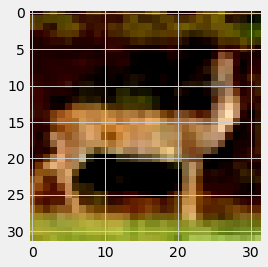

In [63]:
img = torchvision.utils.make_grid(images[10]*2-x.reshape(3,32,32))/(1.75) + 0.5   # unnormalize
npimg = img.detach().numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

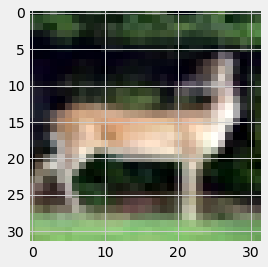

In [64]:
img = torchvision.utils.make_grid(labels[10][1])/(1.75) + 0.5   # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

In [65]:
# Model Initialization
model = AE()
model.to(device)

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),lr = 0.1 ,weight_decay = 1e-8
														              )


epoch : 1 , loss : 0.7565614581108093
epoch : 2 , loss : 0.5057418942451477
epoch : 3 , loss : 0.4988332688808441
epoch : 4 , loss : 0.4999208152294159
epoch : 5 , loss : 0.4988766014575958
epoch : 6 , loss : 0.4925857484340668
epoch : 7 , loss : 0.4938163757324219
epoch : 8 , loss : 0.4927951395511627
epoch : 9 , loss : 0.49277472496032715
epoch : 10 , loss : 0.49135518074035645


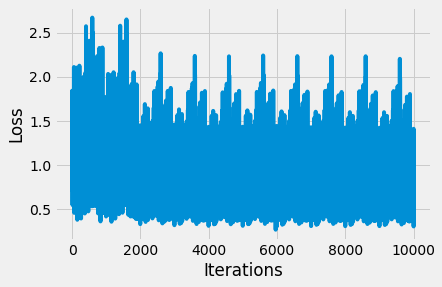

In [66]:
epochs = 10
outputs = []
losses = []
for epoch in range(epochs):
  for i in range(len(images[:1000])):
    x_av = images[i].reshape(-1, 3*32*32)
    label1 = labels[i][0].reshape(-1, 3*32*32)
    label2 = labels[i][1].reshape(-1, 3*32*32)

    # x_av = x_av.
    # label1 = 
    # label2 = 

    x1 = model(x_av)
    x2 = x_av*2-x1
    
    loss = loss_function(x1, label1)
    loss = loss + loss_function(x2, label2)
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    losses.append(loss.detach().numpy())
  outputs.append((epochs, x_av, x1,x2))
  print(f'epoch : {epoch+1} , loss : {loss}')

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses)


In [67]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        ## encoder layers ##
        # conv layer (depth from 3 --> 16), 3x3 kernels
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  
        # conv layer (depth from 16 --> 4), 3x3 kernels
        self.conv2 = nn.Conv2d(16, 4, 3, padding=1)
        # pooling layer to reduce x-y dims by two; kernel and stride of 2
        self.pool = nn.MaxPool2d(2, 2)
        
        ## decoder layers ##
        ## a kernel of 2 and a stride of 2 will increase the spatial dims by 2
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 3, 2, stride=2)

    def forward(self, x):
        ## encode ##
        # add hidden layers with relu activation function
        # and maxpooling after
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        # add second hidden layer
        x = F.relu(self.conv2(x))
        x = self.pool(x)  # compressed representation
        
        ## decode ##
        # add transpose conv layers, with relu activation function
        x = F.relu(self.t_conv1(x))
        # output layer (with sigmoid for scaling from 0 to 1)
        x = F.sigmoid(self.t_conv2(x))
                
        return x

# initialize the NN
model = ConvAutoencoder()
print(model)

ConvAutoencoder(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(16, 3, kernel_size=(2, 2), stride=(2, 2))
)


In [68]:
# specify loss function
# criterion = nn.BCELoss()
criterion = torch.nn.MSELoss()
# specify loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 1 	Training Loss: 0.177766
Epoch: 2 	Training Loss: 0.170435
Epoch: 3 	Training Loss: 0.169023
Epoch: 4 	Training Loss: 0.167847
Epoch: 5 	Training Loss: 0.167238
Epoch: 6 	Training Loss: 0.166907
Epoch: 7 	Training Loss: 0.166679
Epoch: 8 	Training Loss: 0.166508
Epoch: 9 	Training Loss: 0.166363
Epoch: 10 	Training Loss: 0.166216
Epoch: 11 	Training Loss: 0.166116
Epoch: 12 	Training Loss: 0.166034
Epoch: 13 	Training Loss: 0.165960
Epoch: 14 	Training Loss: 0.165888
Epoch: 15 	Training Loss: 0.165825
Epoch: 16 	Training Loss: 0.165762
Epoch: 17 	Training Loss: 0.165713
Epoch: 18 	Training Loss: 0.165658
Epoch: 19 	Training Loss: 0.165633
Epoch: 20 	Training Loss: 0.165582
Epoch: 21 	Training Loss: 0.165544
Epoch: 22 	Training Loss: 0.165508
Epoch: 23 	Training Loss: 0.165486
Epoch: 24 	Training Loss: 0.165451
Epoch: 25 	Training Loss: 0.165422
Epoch: 26 	Training Loss: 0.165403
Epoch: 27 	Training Loss: 0.165385
Epoch: 28 	Training Loss: 0.165357
Epoch: 29 	Training Loss: 0.1

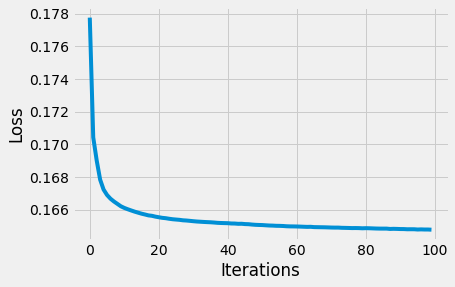

In [69]:
n_epochs = 100
losses = []

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for i in range(len(images[:5000])):
        # _ stands in for labels, here
        # no need to flatten images
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        x_av = images[i]
        # forward pass: compute predicted outputs by passing inputs to the model
        x1 = model(x_av)
        # calculate the loss
        label1 = labels[i][0]
        label2 = labels[i][1]

        x2 = x_av*2-x1
        
        loss = criterion(x1,label1)
        loss = loss + criterion(x2,label2)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.detach().numpy()
            
    # print avg training statistics 
    train_loss = train_loss/len(train_loader)
    losses.append(train_loss)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses)

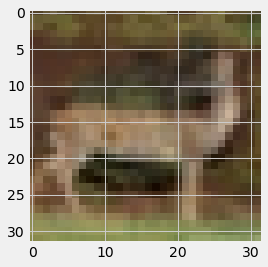

In [70]:
img = torchvision.utils.make_grid(images[10])/(1.75) + 0.5   # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


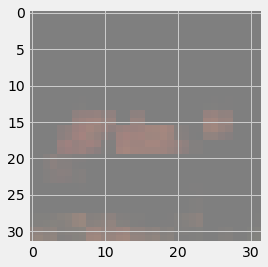

In [71]:
x = model(images[10])
img = torchvision.utils.make_grid(x)/(1.75) + 0.5   # unnormalize
npimg = img.detach().numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

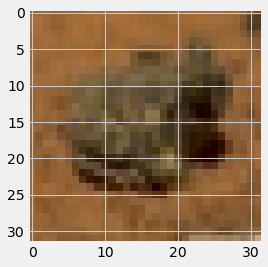

In [72]:
img = torchvision.utils.make_grid(labels[10][0])/(1.75) + 0.5   # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

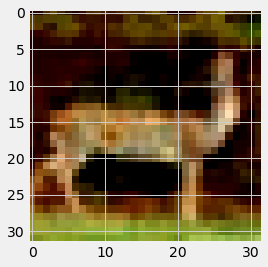

In [73]:
img = torchvision.utils.make_grid(images[10]*2-x)/(1.75) + 0.5   # unnormalize
npimg = img.detach().numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

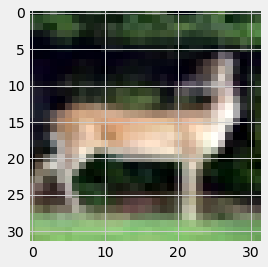

In [74]:
img = torchvision.utils.make_grid(labels[10][1])/(1.75) + 0.5   # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()